In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [2]:
oliv = datasets.fetch_olivetti_faces()

In [3]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [4]:
print(oliv["data"].shape)
print(oliv["images"].shape)

(400, 4096)
(400, 64, 64)


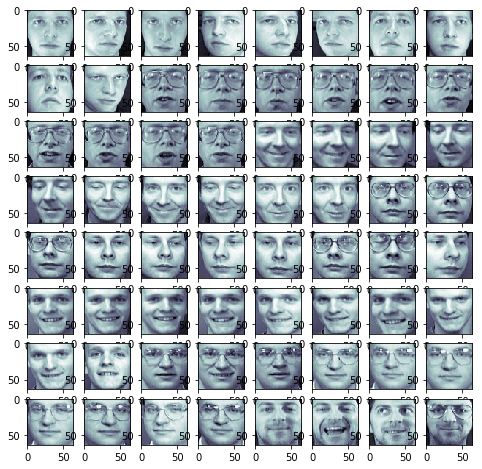

In [5]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i], cmap = plt.cm.bone)
plt.show()

In [6]:
x = oliv.data
y = oliv.target
print(x.shape)
print(y.shape)

(400, 4096)
(400,)


In [7]:
pca = PCA()
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
# As exected pca.componets_ should have 4096 * 4096 elements
# But it has not
# eigen vectors
print(pca.components_.shape)
# eigen values
pca.explained_variance_.shape

(400, 4096)


(400,)

In [10]:
# finding  the optimal value of no. of features (k)
k = 0
total = sum(pca.explained_variance_)
current_sum = 0
while current_sum/total < 0.95:
    current_sum += pca.explained_variance_[k]
    k += 1
k

123

In [11]:
pca = PCA(n_components = k)
x_t = pca.fit_transform(x)
x_t.shape

(400, 123)

In [12]:
x_approx = pca.inverse_transform(x_t)
x_approx.shape

(400, 4096)

In [13]:
x_approx_images = x_approx.reshape((400, 64 ,64))

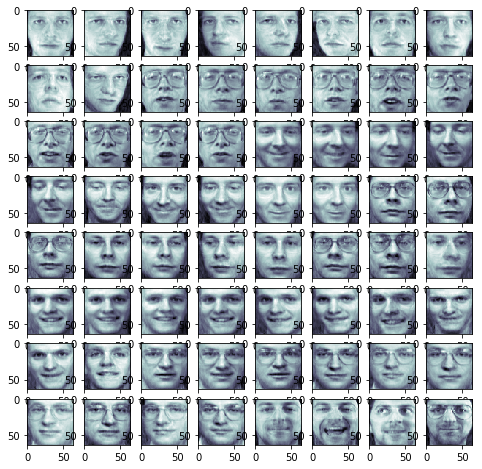

In [14]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i], cmap = plt.cm.bone)
plt.show()

In [19]:
eigenValue = pca.components_
print(eigenValue.shape)
eigenValue = eigenValue.reshape((123, 64, 64))
eigenValue.shape

(123, 4096)


(123, 64, 64)

In [1]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigenValue[i], cmap = plt.cm.bone)
plt.show()

NameError: name 'plt' is not defined